# Marcus Theory

In [58]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

## Transition rate

kij = transition rate <br>
Iij = electronic coupling <br>
Delta_G0 = Difference between minima of potential energy curves <br>
lambda (/l) = Reorganization energy <br>

In [53]:
pi = 3.14159265359
h = 6.62607004 * math.pow(10,-34) # [m2 kg / s]
hbar = 1.0545718 * math.pow(10,-34) # [m2 kg / s]
kb = 1.38064852 * math.pow(10,-23) # [m2 kg / (s2 K)]
T = 300 # [K]

trans_rate = kij * h * kb * T / (|Iij|^2 * 2 * pi^(3/2)) <br>
g_kT = Delta_G0 / (kb * T) <br>
l_kT = l / (kb * T) <br>

In [112]:
def trans_rate_G(G_kT, l_kT):
    # G_kT = list of values
    # l_kT = number 
    
    trans_rate_list = []
    
    for g_kT in G_kT:
        trans_rate = 1/(math.sqrt(l_kT)) *math.exp((-(g_kT + l_kT)**2) / (4 * l_kT))
        trans_rate_list.append(trans_rate)
        
    return trans_rate_list

In [120]:
def trans_rate_l(g_kT, L_kT):
    # G_kT = number
    # L_kT = list of values 
    
    trans_rate_list = []
    
    for l_kT in L_kT:
        trans_rate = 1/(math.sqrt(l_kT)) *math.exp((-(g_kT + l_kT)**2) / (4 * l_kT))
        trans_rate_list.append(trans_rate)
        
    return trans_rate_list

### Transition rate as a function of G

In [136]:
GkT_list = np.arange(-20,20,0.2)

In [186]:
rate_l_10 = trans_rate_G(GkT_list, 10)
rate_l_8 = trans_rate_G(GkT_list, 8)
rate_l_6 = trans_rate_G(GkT_list, 6)
rate_l_5 = trans_rate_G(GkT_list, 5)
rate_l_4 = trans_rate_G(GkT_list, 4)
rate_l_2 = trans_rate_G(GkT_list, 2)
rate_l_1 = trans_rate_G(GkT_list, 1)
rate_l_05 = trans_rate_G(GkT_list, 0.5)
rate_l_01 = trans_rate_G(GkT_list, 0.1)

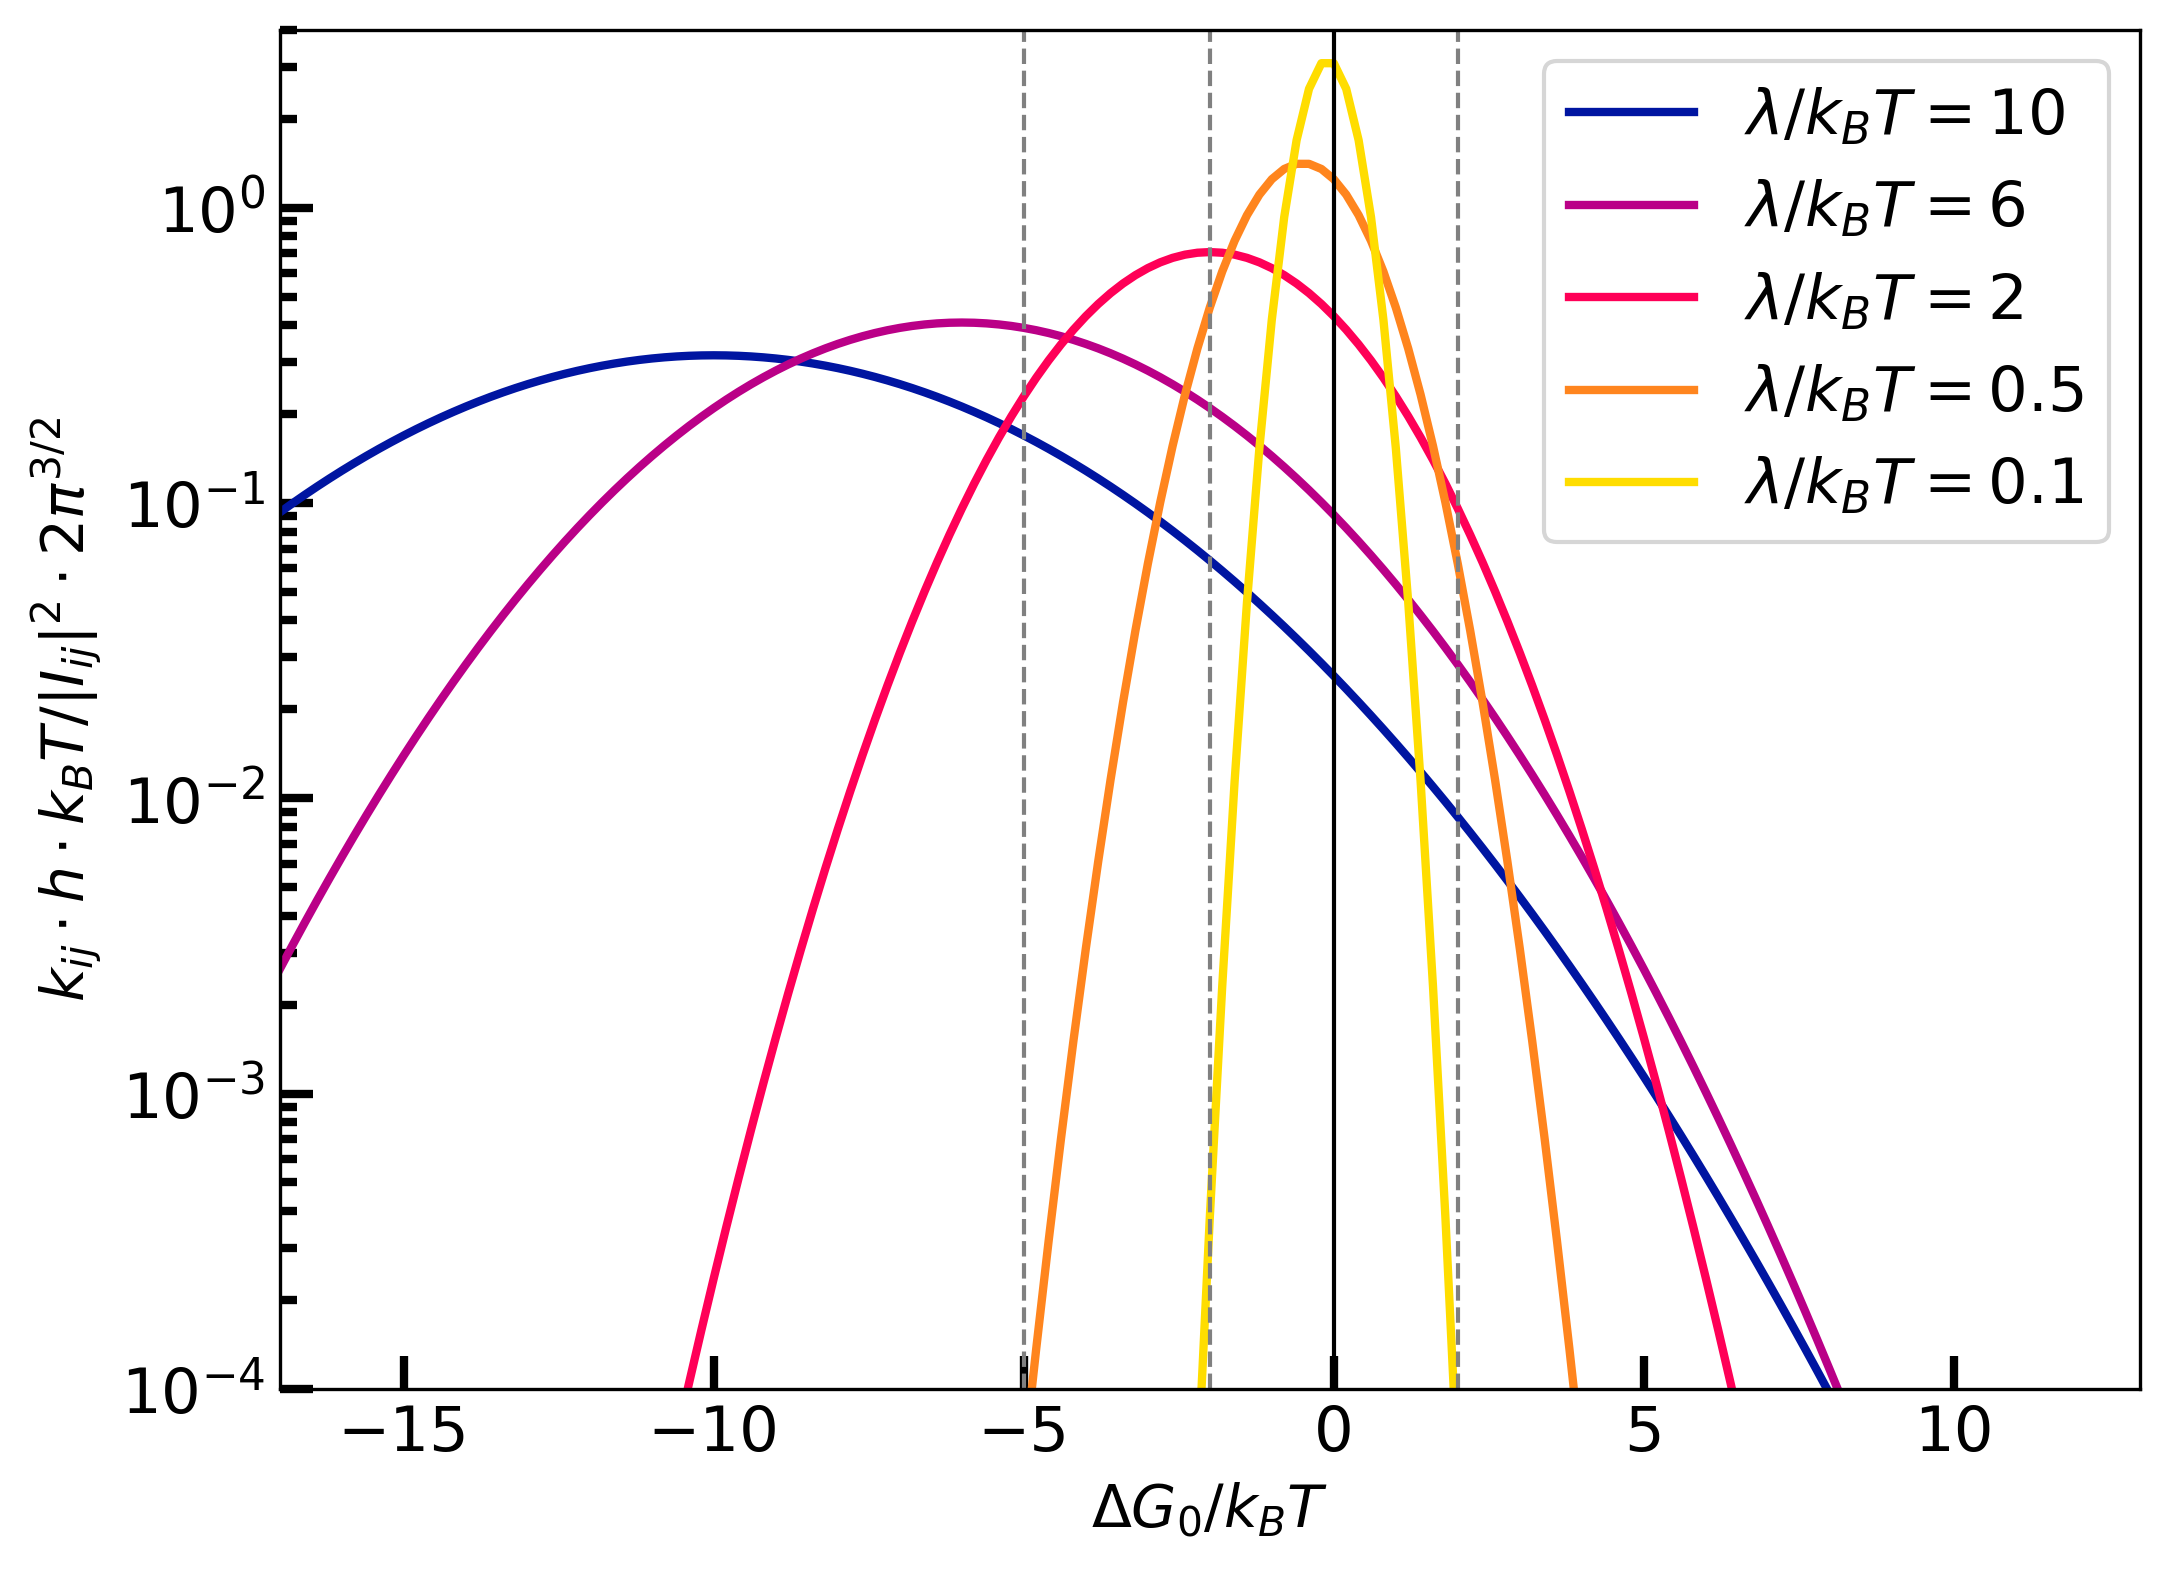

In [197]:
plt.figure(figsize=(8,6), dpi=300)
plt.semilogy(GkT_list, rate_l_10, linewidth=2, color='#0015a1', label='$\lambda/k_{B}T = 10$')
#plt.semilogy(GkT_list, rate_l_8, linewidth=2)
plt.semilogy(GkT_list, rate_l_6, linewidth=2, color='#ba0087', label='$\lambda/k_{B}T = 6$')
#plt.semilogy(GkT_list, rate_l_5, linewidth=2)
#plt.semilogy(GkT_list, rate_l_4, linewidth=2)
plt.semilogy(GkT_list, rate_l_2, linewidth=2, color='#ff0057', label='$\lambda/k_{B}T = 2$')
#plt.semilogy(GkT_list, rate_l_1, linewidth=2)
plt.semilogy(GkT_list, rate_l_05, linewidth=2, color='#ff851e', label='$\lambda/k_{B}T = 0.5$')
plt.semilogy(GkT_list, rate_l_01, linewidth=2, color='#ffdd00', label='$\lambda/k_{B}T = 0.1$')

plt.axvline(x=0, color='black', linewidth=1)
plt.axvline(x=2, color='grey', linewidth=1, linestyle='--')
plt.axvline(x=-2, color='grey', linewidth=1, linestyle='--')
plt.axvline(x=-5, color='grey', linewidth=1, linestyle='--')

plt.legend(fontsize=15)

plt.xlabel('$\Delta G_{0}/k_{B}T$', fontsize=14)
plt.ylabel('$k_{ij} \cdot h \cdot k_{B}T / |I_{ij}|^2 \cdot 2\pi^{3/2}$', fontsize=14)

plt.tick_params(labelsize=15, direction='in', axis='both', which='major', length=8, width=2)
plt.tick_params(labelsize=15, direction='in', axis='both', which='minor', length=4, width=2)

plt.ylim(0.0001, 4)
plt.xlim(-17, 13);

### Transition rate as a function of lambda

In [118]:
LkT_list = np.arange(0.1,10,0.1)

In [154]:
rate_g_5 = trans_rate_l(5, LkT_list)
rate_g_2 = trans_rate_l(2, LkT_list)
rate_g_0 = trans_rate_l(0, LkT_list)
rate_g_m2 = trans_rate_l(-2, LkT_list)
rate_g_m5 = trans_rate_l(-5, LkT_list)
rate_g_m10 = trans_rate_l(-10, LkT_list)

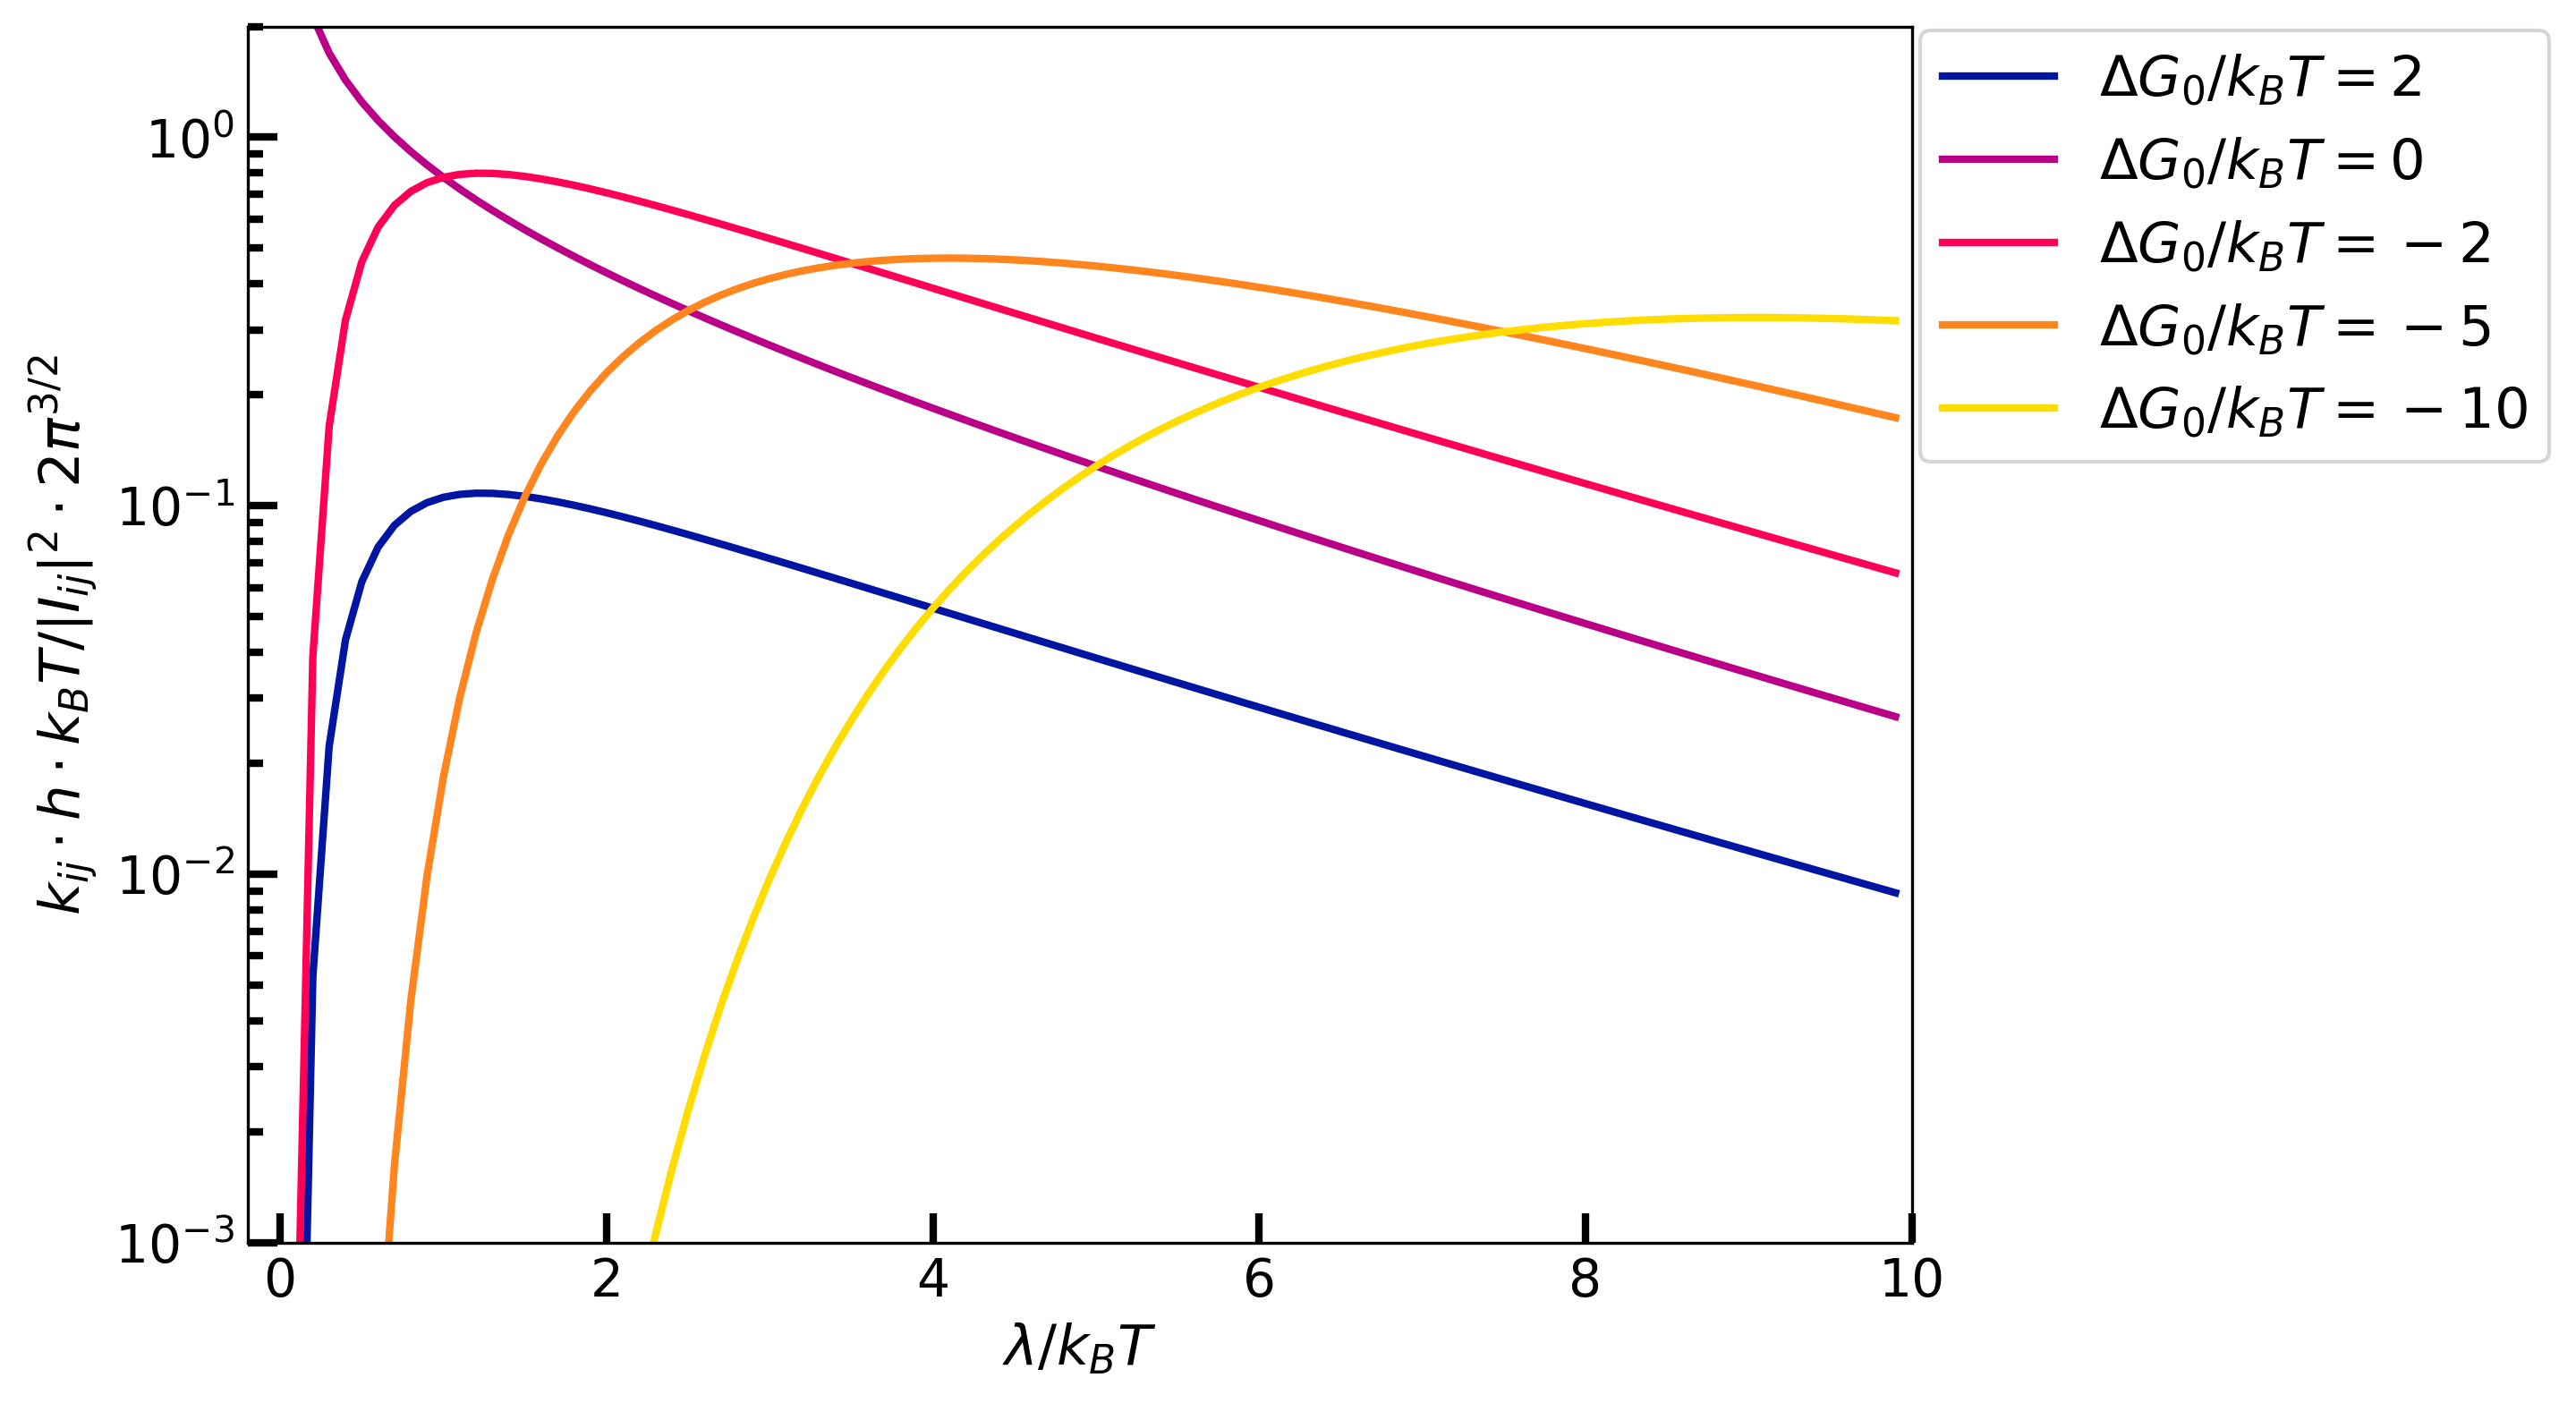

In [200]:
plt.figure(figsize=(8,6), dpi=300)

#plt.semilogy(LkT_list, rate_g_5)
plt.semilogy(LkT_list, rate_g_2, linewidth=2, color='#0015a1', label='$\Delta G_{0}/k_{B}T = 2$')
plt.semilogy(LkT_list, rate_g_0, linewidth=2, color='#ba0087', label='$\Delta G_{0}/k_{B}T = 0$')
plt.semilogy(LkT_list, rate_g_m2, linewidth=2, color='#ff0057', label='$\Delta G_{0}/k_{B}T = -2$')
plt.semilogy(LkT_list, rate_g_m5, linewidth=2, color='#ff851e', label='$\Delta G_{0}/k_{B}T = -5$')
plt.semilogy(LkT_list, rate_g_m10, linewidth=2, color='#ffdd00', label='$\Delta G_{0}/k_{B}T = -10$')

plt.legend(fontsize=15, bbox_to_anchor=(0.9, 0.52, 0.5, 0.5))

plt.xlabel('$\lambda/k_{B}T$', fontsize=15)
plt.ylabel('$k_{ij} \cdot h \cdot k_{B}T / |I_{ij}|^2 \cdot 2\pi^{3/2}$', fontsize=15)

plt.tick_params(labelsize=14, direction='in', axis='both', which='major', length=8, width=2)
plt.tick_params(labelsize=14, direction='in', axis='both', which='minor', length=4, width=2)

plt.xlim(-0.2, 10)
plt.ylim(10**(-3), 2);

### Activation Energy

In [258]:
def Delta_G_G(G, l):
    # G = list of values
    # l = number
    
    delta_G = []
    
    for g in G:
        del_G = (g + l)**2 / (4*l)
        delta_G.append(del_G)
        
    return delta_G

In [248]:
Delta_G_list = np.arange(-20, 10, 0.1)

In [259]:
G_l_01 = Delta_G_G(Delta_G_list, 0.1)
G_l_05 = Delta_G_G(Delta_G_list, 0.5)
G_l_2 = Delta_G_G(Delta_G_list, 2)
G_l_6 = Delta_G_G(Delta_G_list, 6)
G_l_10 = Delta_G_G(Delta_G_list, 10)

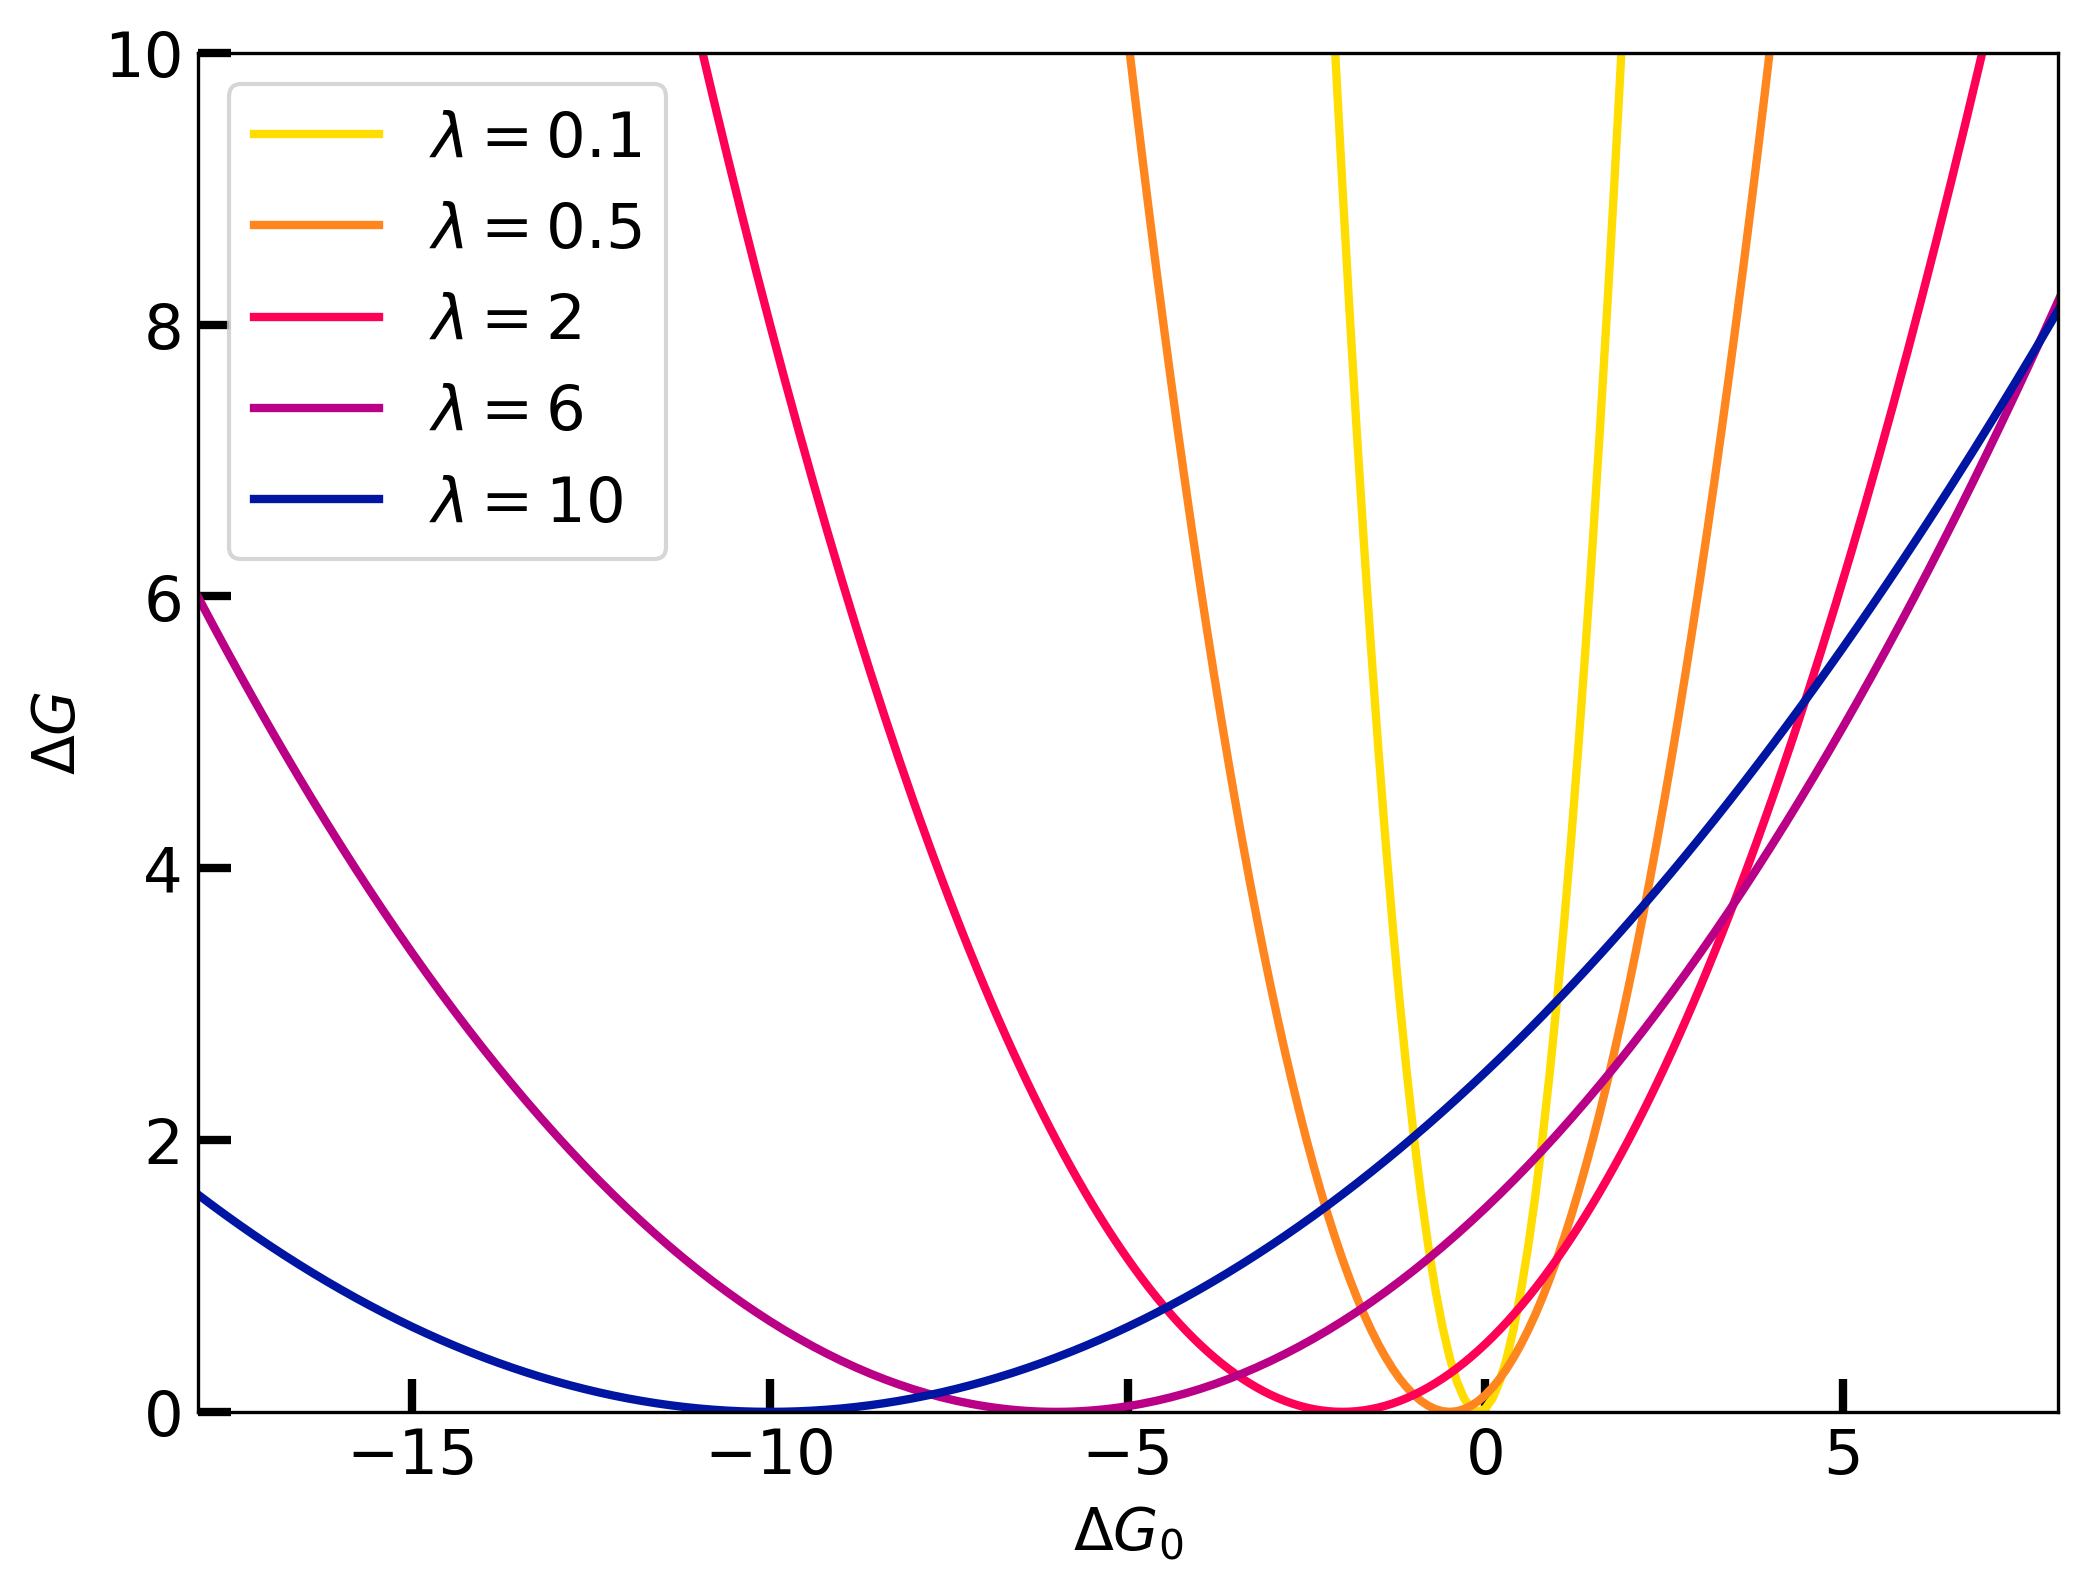

In [254]:
plt.figure(figsize=(8,6), dpi=300)

plt.plot(Delta_G_list, G_l_01, linewidth=2, color='#ffdd00', label='$\lambda = 0.1$')
plt.plot(Delta_G_list, G_l_05, linewidth=2, color='#ff851e', label='$\lambda = 0.5$')
plt.plot(Delta_G_list, G_l_2, linewidth=2, color='#ff0057', label='$\lambda = 2$')
plt.plot(Delta_G_list, G_l_6, linewidth=2, color='#ba0087', label='$\lambda = 6$')
plt.plot(Delta_G_list, G_l_10, linewidth=2, color='#0015a1', label='$\lambda = 10$')

plt.legend(fontsize=15)

plt.xlabel('$\Delta G_{0}$', fontsize=14)
plt.ylabel('$\Delta G$', fontsize=14)

plt.tick_params(labelsize=15, direction='in', axis='both', which='major', length=8, width=2)
plt.tick_params(labelsize=15, direction='in', axis='both', which='minor', length=4, width=2)

plt.ylim(0, 10)
plt.xlim(-18, 8);

In [262]:
def Delta_G_l(g, L):
    # g = number
    # l = list of values
    
    L_list = []
    
    for l in L:
        del_G = (g + l)**2 / (4*l)
        L_list.append(del_G)
        
    return L_list

In [263]:
L_list = np.arange(0.1, 10, 0.1)

In [266]:
L_g_0 = Delta_G_l(-5, L_list)

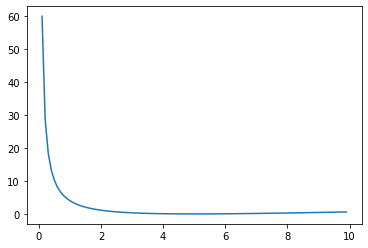

In [267]:
plt.plot(L_list, L_g_0)